In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.svm import SVC, SVR 
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [63]:
import os

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load in Dataset & Transform Data

In [33]:
labels = pd.read_csv('field_names.txt', header=None) # Import the lables
cancer = pd.read_csv('breast-cancer.csv', header=None) # Import the breast cancer data
labels = labels.squeeze() # squeeze the labels so that they can be applied to the cancer df as columns
cancer.columns = labels # Add the labels as the column titles
cancer['diagnosis'] = cancer['diagnosis'].map({"M" : 0, "B" : 1}) # Map the diagnosis to be 1 for breast cancer and 0 for malignant 
cancer.head(3) # check out our DF

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Plot the relationships between the Diagnosis and the Mean of each feature

The plots below display all of the relationships between the means of features of those who were diagnosed as having breast cancer vs. those who were diagnosed as having malignant tumors. The X axis of each of the graphs is two columns: 0 (representing those who were diagnosed as malignant) and 1 (representing those who were diagnosed as having cancer). The points are specific values in the sample space. you can see the radius_mean, smoothness_mean, and fractal_dimension_mean seem to be more related with the target variable than the other variables. For example compactness and area don't seem to be particularly related at all.

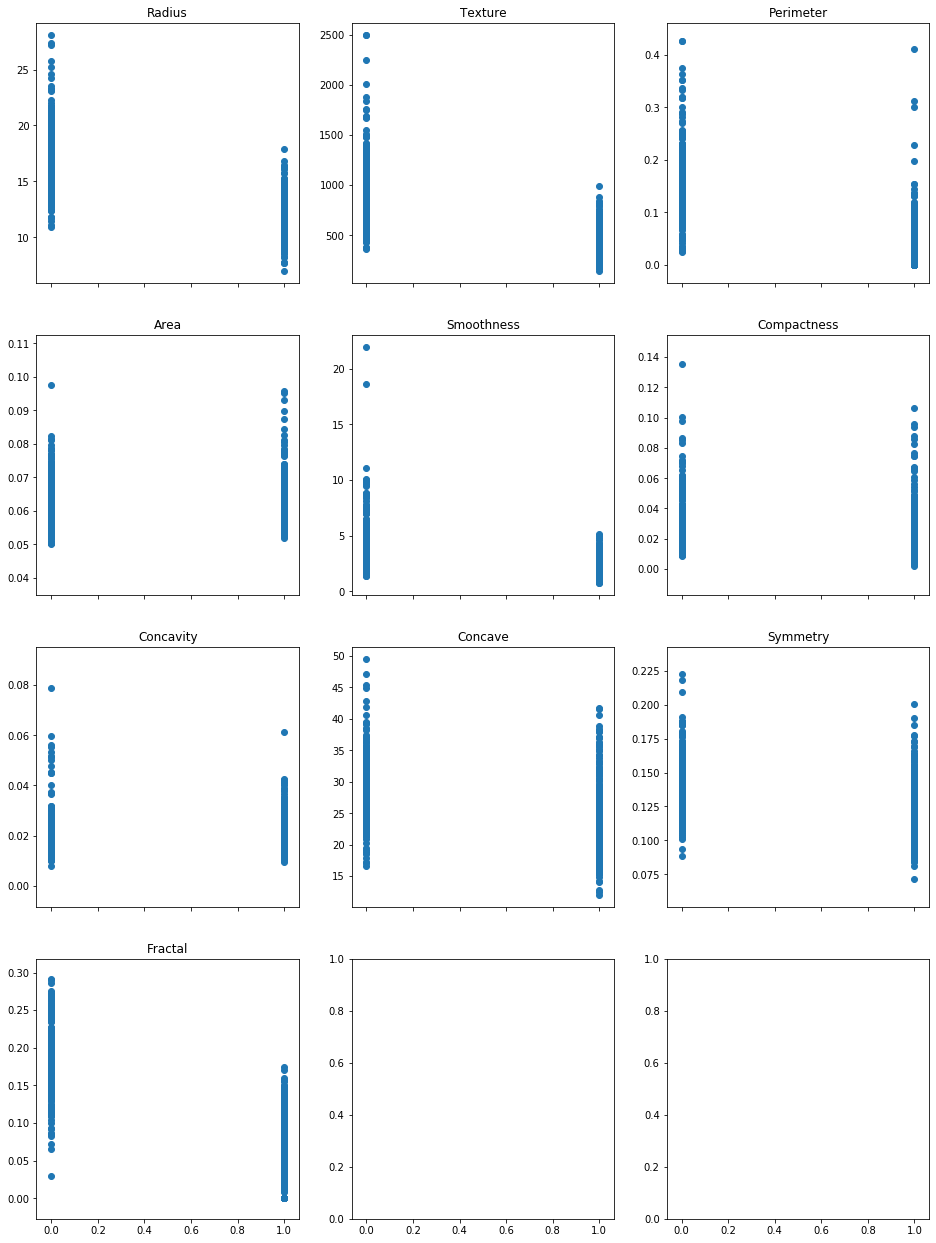

In [5]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, sharex=True, sharey=False, figsize=(16,22))
ax1.scatter(cancer['diagnosis'], cancer["radius_mean"])
ax2.scatter(cancer['diagnosis'], cancer["texture_mean"])
ax3.scatter(cancer['diagnosis'], cancer["perimeter_mean"])
ax4.scatter(cancer['diagnosis'], cancer["area_mean"])
ax5.scatter(cancer['diagnosis'], cancer["smoothness_mean"])
ax6.scatter(cancer['diagnosis'], cancer["compactness_mean"])
ax7.scatter(cancer['diagnosis'], cancer["concavity_mean"])
ax8.scatter(cancer['diagnosis'], cancer["concave_points_mean"])
ax9.scatter(cancer['diagnosis'], cancer["symmetry_mean"])
ax10.scatter(cancer['diagnosis'], cancer["fractal_dimension_mean"]);
ax1.set_title("Radius")
ax2.set_title("Texture")
ax3.set_title("Perimeter")
ax4.set_title("Area")
ax5.set_title("Smoothness")
ax6.set_title("Compactness")
ax7.set_title("Concavity")
ax8.set_title("Concave")
ax9.set_title("Symmetry")
ax10.set_title("Fractal");

In [6]:
cancer.head(3)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Plot the relationships between the Diagnosis and the Worst value of each feature

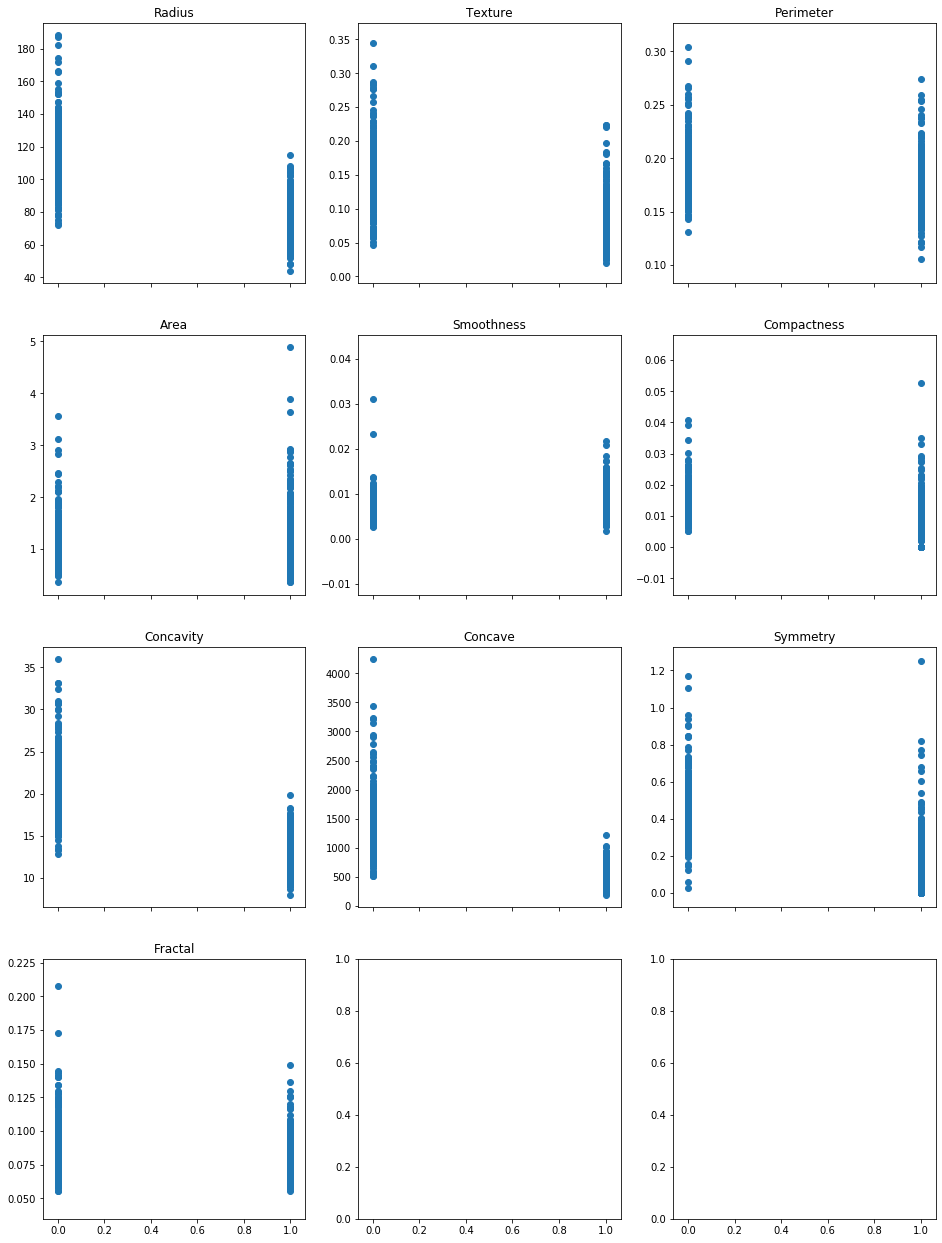

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, sharex=True, sharey=False, figsize=(16,22))
ax1.scatter(cancer['diagnosis'], cancer["radius_worst"])
ax2.scatter(cancer['diagnosis'], cancer["texture_worst"])
ax3.scatter(cancer['diagnosis'], cancer["perimeter_worst"])
ax4.scatter(cancer['diagnosis'], cancer["area_worst"])
ax5.scatter(cancer['diagnosis'], cancer["smoothness_worst"])
ax6.scatter(cancer['diagnosis'], cancer["compactness_worst"])
ax7.scatter(cancer['diagnosis'], cancer["concavity_worst"])
ax8.scatter(cancer['diagnosis'], cancer["concave_points_worst"])
ax9.scatter(cancer['diagnosis'], cancer["symmetry_worst"])
ax10.scatter(cancer['diagnosis'], cancer["fractal_dimension_worst"]);
ax1.set_title("Radius")
ax2.set_title("Texture")
ax3.set_title("Perimeter")
ax4.set_title("Area")
ax5.set_title("Smoothness")
ax6.set_title("Compactness")
ax7.set_title("Concavity")
ax8.set_title("Concave")
ax9.set_title("Symmetry")
ax10.set_title("Fractal");

## Look at how the mean of smoothness, compactness and fractal dimension compares from those diagnosed with breast cancer to those who were classified as malignant. 

In [8]:
cancer.groupby(by="diagnosis")['smoothness_mean', 'compactness_mean', 'fractal_dimension_mean'].agg(['mean'])

,smoothness_mean,compactness_mean,fractal_dimension_mean
,mean,mean,mean
diagnosis,,,
0,4.323929,0.032281,0.182237
1,2.000321,0.021438,0.074444


### Writing a function to bootstrap our data

In [55]:
def bootstrap_data(x):
    x_bootstraped = x.sample(
        n=x.shape[0], # sample of size n
        replace=True,
        random_state=42)
    return x_bootstraped

In [56]:
cancer = bootstrap_data(cancer) # Using the bootstrapping function to bootstrap the cancer DF

In [57]:
y = cancer['diagnosis'] # Setting the target variable which is diagnosis to y
X = cancer.drop(columns='diagnosis') # Setting our features to test to X

In [58]:
ss = StandardScaler() # Instantiate a standard scalar
X_sc = ss.fit_transform(X) # Fit and transform our X variable
# ros = RandomOverSampler(random_state=0) # Instantiate a random oversampler in order to oversample our training set
# X_resampled, y_resampled = ros.fit_resample(X_sc, y) # Fit that oversampler to our X_sc (scaled) and y data
# print(sorted(Counter(y_resampled).items())) # Show the balance btw classes

In [59]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, random_state=100, test_size=0.25)

# Modeling:
### Here we are going to instantiate a number of different models. I chose the modeling parameters by running each model through a GridSearch below

In [60]:
lr_class = LogisticRegression(penalty='l2', C=0.08902150854450389, solver='liblinear')
knn_class = KNeighborsClassifier(n_neighbors=3, p=4, leaf_size=10)
tree_class = DecisionTreeClassifier(max_features='auto', min_samples_leaf=3, min_samples_split=4, random_state=100)
bag_class = BaggingClassifier(bootstrap=False, max_features=8, max_samples=100, n_estimators=100, random_state=100)
forest_class = RandomForestClassifier(bootstrap=True, max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=8, n_estimators=9, random_state=100)
ada_class = AdaBoostClassifier(learning_rate=0.78, n_estimators=100, random_state=100)
svc = SVC(degree=8, C=2.5, gamma=0.1, kernel='poly', random_state=100)
grad_class = GradientBoostingClassifier(learning_rate=0.08646535029500364, n_estimators=35, min_samples_leaf=3, min_samples_split=7, max_depth=4)

In [61]:
# Make a dictionary of each of the models with a corresponding label
class_models = {
            'lr_class': lr_class, 
            'forest_class': forest_class, 
            'tree_class': tree_class,
            'ada_class': ada_class,            
            'knn_class': knn_class, 
            'bag_class': bag_class, 
            'svc': svc,
            "grad": grad_class
                } 
# Create empty lists to populate with our training and testing predictions
y_pred_test = []
y_pred_train = []

# Writing a for loop to iterate through each of the models above, generate predictions from each model & append to predictions lists
for model in class_models.values():
    model.fit(X_train, y_train)
    y_pred_test.append(model.predict(X_test))
    y_pred_train.append(model.predict(X_train))

y_pred_test = pd.DataFrame(y_pred_test, index=class_models.keys()).T # Turn the list into a DF
y_pred_train = pd.DataFrame(y_pred_train, index=class_models.keys()).T # Turn the list into a DF
print(f'This is the shape of y_test preds {y_pred_test.shape}')
print(f'This is the shape of y_test preds {y_pred_train.shape}')

########### 
# In the line below I am creating a dictionary which will serve as the shell for a DF that will include all of the
# evaluation metrics I want to display for each model: Accuracy, F1-Scores and TP, FP, TN & FN
accuracy = {'train_acc': [], 'test_acc': [], 'F1-train': [], 'F1-test': [], 'true_neg': [], 'fal_pos': [], 'fal_neg': [], 'true_po': []}
for model in class_models.values():
    accuracy['train_acc'].append(model.score(X_train, y_train))
    accuracy['test_acc'].append(model.score(X_test, y_test))
for col in y_pred_test:
    accuracy['F1-train'].append(f1_score(y_train, y_pred_train[col]))
    accuracy['F1-test'].append(f1_score(y_test, y_pred_test[col]))
for col in y_pred_test:
    accuracy['true_neg'].append(confusion_matrix(y_test, y_pred_test[col])[0][0])
    accuracy['fal_pos'].append(confusion_matrix(y_test, y_pred_test[col])[0][1])
    accuracy['fal_neg'].append(confusion_matrix(y_test, y_pred_test[col])[1][0])
    accuracy['true_po'].append(confusion_matrix(y_test, y_pred_test[col])[1][1])
    
accuracy = pd.DataFrame(accuracy, index=class_models.keys())
accuracy

This is the shape of y_test preds (143, 8)
This is the shape of y_test preds (426, 8)


,train_acc,test_acc,F1-train,F1-test,true_neg,fal_pos,fal_neg,true_po
lr_class,0.985915,0.986014,0.987805,0.988506,55,2,0,86
forest_class,0.988263,0.986014,0.989858,0.988506,55,2,0,86
tree_class,0.983568,0.958042,0.985567,0.964706,55,2,4,82
ada_class,1.000000,0.986014,1.000000,0.988506,55,2,0,86
knn_class,0.983568,0.972028,0.985685,0.976744,55,2,2,84
bag_class,0.988263,0.986014,0.989858,0.988506,55,2,0,86
svc,0.988263,0.937063,0.989858,0.949153,50,7,2,84
grad,1.000000,0.972028,1.000000,0.977273,53,4,0,86


## Model Explanation and Evaluation

In the output above you can see that we tested both training and testing accuracy in order to be sure that our model wasn't over fitting. In addition this project is an attempt to look at data from breast cancer patients and determine the best way to be able to classify if someone is likely to have a malignant tumor or a tumor that indicates breast cancer. In this case, we need to look at a few more metrics. The F1-Score is an important metric in this analysis because it compares the harmonic mean between the precision and the recall. So basically it is testing to see how well your model does at controlling for both false positives and false negatives. In this can we are very concerned with having a false negative. We do not want to tell a patient that their tumor is malignant if it actually is a cancer tumor. You can see above that the models are doing a good job controlling for false negatives. The Adaboost Classifier, Gradient Boosting Classifier, Logistic Regression and Random Forest Classifier are all producing high accuracy and F1 scores while also having no false. I have found that with classification problems, these models typically outperform Bagging Classifiers and Decision Tree Classifiers, so the result isn't surprising. 

In [50]:
# This is quite simply the cell I used to gridseach through each of the models
params = {
    'penalty' : ['l1', 'l2'],
#     'min_samples_leaf' : [2, 3],
#     'min_samples_split' : [6, 7, 8],
#     'n_estimators' : [30, 35, 37],
    "C" : (np.logspace(-2, 0, 100)),
    "solver" : ['liblinear']
}
gs = GridSearchCV(
    LogisticRegression(),
    params,
    cv=3,
    verbose=1,
    return_train_score=False,
    n_jobs=2)
gs.fit(X_train, y_train)
print(gs.best_score_)
print()
print(gs.best_params_)
print()
print(gs.score(X_test, y_test))
pred = model.predict(X_test)
f1_score(y_test, pred)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


0.9835680751173709

{'C': 0.08902150854450389, 'penalty': 'l2', 'solver': 'liblinear'}

0.9790209790209791


[Parallel(n_jobs=2)]: Done 600 out of 600 | elapsed:    0.9s finished


0.9878048780487805